## Load the Cleaned Data

In [12]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
data_path = '../data/processed/cleaned_data.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Age Group,Total curricular grade,Full-time/Part-time
0,1,17,5,171,1,1,122.0,1,19,12,...,0,-1.965152,0,-0.287638,0.124386,0.765761,1,18-25,-4.164576,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,0.661712,0,0.876222,-1.105222,0.347199,0,18-25,1.357835,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,-1.965152,0,-0.287638,0.124386,0.765761,1,18-25,-4.164576,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,5,0.418247,0,-0.813253,-1.466871,-1.375511,0,18-25,0.996184,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,0.533572,0,0.876222,-1.105222,0.347199,0,36-45,0.884987,1


## Perform Descriptive Statistics: Descriptive statistics provide a summary of the central tendency, dispersion, and shape of the dataset's distribution.

In [13]:
# Get descriptive statistics for numerical columns
numeric_stats = df.describe()

# Get descriptive statistics for categorical columns
categorical_stats = df.describe(include='object')

# Print descriptive statistics
print("Numerical Descriptive Statistics:")
print(numeric_stats)

print("\nCategorical Descriptive Statistics:")
print(categorical_stats)

Numerical Descriptive Statistics:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000             

##  Correlation Analysis: Perform correlation analysis to identify relationships between numerical variables. You can use Pearson’s correlation coefficient for this.

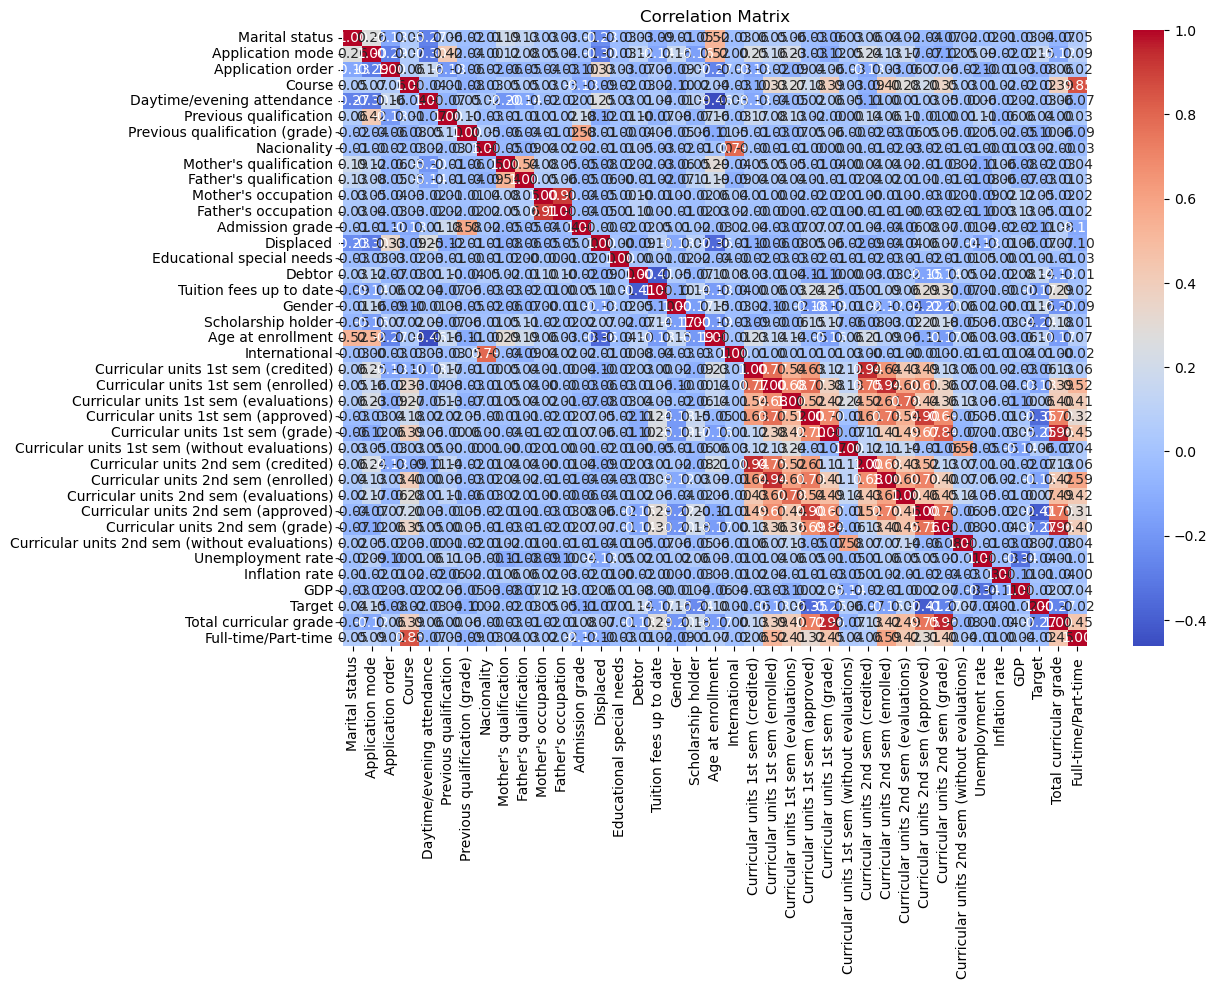

In [14]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Perform Hypothesis Tests

### T-test to compare whether the mean admission grade differs significantly between students who drop out and those who graduate.

In [15]:
# Group by the Target column (1 = Dropout, 0 = Graduate)
dropouts = df[df['Target'] == 1]['Admission grade']
graduates = df[df['Target'] == 0]['Admission grade']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(dropouts, graduates)

print(f"T-test results for Admission Grade (Dropout vs Graduate):\nT-statistic: {t_stat}, P-value: {p_value}")

T-test results for Admission Grade (Dropout vs Graduate):
T-statistic: -7.858080706112452, P-value: 5.10041451309121e-15


### Chi-square test to see if there is a relationship between gender and dropout rates.

In [16]:
# Create a contingency table for Gender and Target
contingency_table = pd.crosstab(df['Gender'], df['Target'])

# Perform the chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test results for Gender vs Dropout:\nChi-square stat: {chi2_stat}, P-value: {p_val}")

Chi-square test results for Gender vs Dropout:
Chi-square stat: 233.2664324962386, P-value: 2.2224795668092133e-51
